**Task 4:** Find a data set which is suitable for multi-class (class number is greater than two) classification (there is no limit on the number of features or type of the features). Then, apply K-nearest neighbors algorithm and multinomial regression to this data set to find the best performing model with respect to a classification metric. Explain the reason (give support) why you picked that model as the final one.


## Body Mass Index Dataset

### Data Decription

The dataset aims to estimate BMI using Gender, Height, and Weight. However, it's highly imbalanced with a limited sample size. The data has four columns including Gender, Height, Weight, and Index representing the BMI level.

**Attributes**
1. `Gender`
2. `Weight`
3. `Height`

**Target Attribute**

4. `Index`

**For more details on DataSet check:**  https://www.kaggle.com/datasets/yasserh/bmidataset?select=bmi.csv

## Classifier Implementation

In [1]:
# Ignore all warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, ConfusionMatrixDisplay, classification_report, accuracy_score

## Loading Dataset

In [3]:
# Load Data
data = pd.read_csv("datasets/bmi.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


The dataset has 500 entries and 4 columns: Gender, Height, Weight, and Index. Gender is of object type, while the rest are of int64 type. There are no null values.

## Splitting Data Set

- `train_test_split` function from `sklearn.model_selection` module is used to split the data into training and test sets.
- The training set consists of 80% of the data, and the test set consists of 20% of the data.
- The random state is set to 42 for reproducibility.
- The input features for the training set are stored in `X_train`.
- The target variable for the training set is stored in `y_train`.
- The input features for the test set are stored in `X_test`.
- The target variable for the test set is stored in `y_test`.


In [5]:
# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['Index']), 
    data['Index'], 
    test_size=0.2, 
    random_state=1300, 
    stratify=data['Index']
)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 3)
(100, 3)
(400,)
(100,)


- The first two lines show the shape of the independent variable data after splitting into 80:20 train-test ratio.
- The third and fourth lines show the shape of the dependent variable data as 1D arrays.
- The feature data has shapes (400, 3) and (100, 3) for train and test, respectively.
- This indicates 3 features with 400 training samples and 100 test samples.
- The target data has shapes (400,) and (100,) for train and test, respectively.
- This indicates 400 training labels and 100 test labels.

## **1. Classification Model based on K-Nearest Neighbour**

In [7]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(metric='minkowski', p=2))

#defining parameter range
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 30))}

#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1773) 

grid_search = GridSearchCV(estimator = knn_pipe, param_grid = param_grid, 
                           scoring='accuracy', cv = kcv_index, #accuracy is the default metric
                           return_train_score=True) 

In [8]:
# Define the preprocessing steps for numerical and categorical data
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['Height', 'Weight']),
        ('cat', cat_transformer, ['Gender'])
    ])

# Define the KNN model
knn = KNeighborsClassifier()

# Define the pipeline
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define the hyperparameters to search
param_grid_knn = {
    'classifier__n_neighbors': list(range(1, 30)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p':[1,2]
}

#Stratified Cross Validation
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=11) 

# Perform grid search with cross-validation
gs_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=cv)

# Fit the model
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Height',
                                                                          'Weight']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20, 21, 22, 23,
                                                     24, 25, 26, 27, 28, 29],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']})

- `Two pipelines` are defined to preprocess numerical and categorical data.
- A preprocessor is defined which uses the pipelines to preprocess the data.
- A `KNN model` is defined.
- A pipeline is defined which uses the preprocessor and the KNN model.
- `Hyperparameters` to search for are defined.
- Grid search with 5`-fold cross-validation` is performed.
- The model is `fit` using the training data.


### Visualizing Classifier Results

In [9]:
# Print best hyperparameters and score
print("Best Hyperparameters:", gs_knn.best_params_)
print("CV Validation Accuracy: %.2f %%" % (gs_knn.best_score_*100))
print('Metric', gs_knn.scorer_)

Best Hyperparameters: {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance'}
CV Validation Accuracy: 90.51 %
Metric <function _passthrough_scorer at 0x000002214A9A25E0>


In [10]:
print('Best Score on Validation Data for KNN')
gs_knn.best_estimator_

Best Score on Validation Data for KNN


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender'])])),
                ('classifier', KNeighborsClassifier(weights='distance'))])

In [11]:
#Evaluate final performance of best logistic classifier on Test Data
print("Accuracy on Test Data: %.2f %%" % (gs_knn.score(X_test, y_test)*100))

Accuracy on Test Data: 84.00 %


An accuracy of `84%` on the test data means that the model was able to predict the correct label for 84 out of 100 samples in the test set. This indicates that the model is performing reasonably well on new, unseen data, but there is still some room for improvement.

**Confusion Metrics**

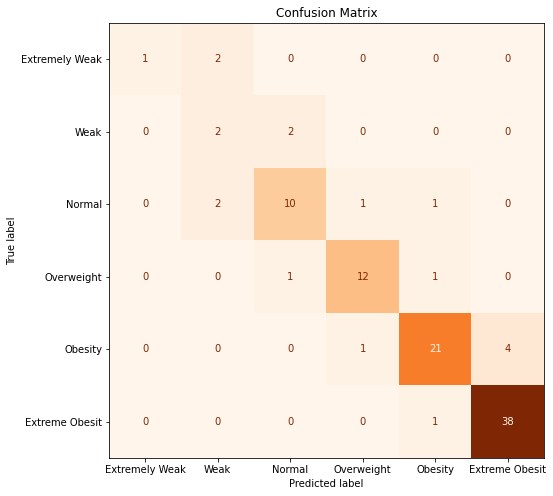

In [12]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Display the confusion matrix
cm = ConfusionMatrixDisplay.from_estimator(gs_knn.best_estimator_, 
                                           X_test, y_test, 
                                           display_labels=['Extremely Weak', 'Weak','Normal', 'Overweight', 'Obesity', 'Extreme Obesit'],
                                           cmap="Oranges",
                                           colorbar=False,
                                           ax=ax)
                                           
cm.ax_.set_title("Confusion Matrix")
plt.show()


As the classification is imbalanced, precision, recall, and f1-score will be used as evaluation metrics to assess the KNN model's performance.

### Calculating Precision, Recall and F1-Score

In [13]:
# Make predictions on the test set
y_pred_knn = gs_knn.predict(X_test)

# Calculate evaluation metrics
prf_knn = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

Here we make predictions on the test set using the KNN model that was fitted using GridSearchCV earlier. The predicted labels are stored in `y_pred_knn`.

Then we calculate evaluation metrics for the KNN model's performance on the test set. Specifically, it computes the precision, recall, F1-score, and support for each class (i.e., each BMI category) using the `precision_recall_fscore_support` function from scikit-learn. The `average` parameter is set to 'weighted', which means that the metrics are computed by taking the weighted average across all classes, weighted by the number of samples in each class. The resulting precision, recall, and F1-score are stored in the `prf_knn` variable.

In [14]:
# Print the classification report

print("Classification report:")
print(classification_report(y_test, y_pred_knn))

# Print the evaluation metrics
print("Precision: {:.4f}".format(prf_knn[0]))
print("Recall: {:.4f}".format(prf_knn[1]))
print("F1-score: {:.4f}".format(prf_knn[2]))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      0.50      0.40         4
           2       0.77      0.71      0.74        14
           3       0.86      0.86      0.86        14
           4       0.88      0.81      0.84        26
           5       0.90      0.97      0.94        39

    accuracy                           0.84       100
   macro avg       0.79      0.70      0.71       100
weighted avg       0.85      0.84      0.84       100

Precision: 0.8514
Recall: 0.8400
F1-score: 0.8390


The classification report provides detailed information about the performance of the KNN model on the test data.

1. `Precision`: It is the ratio of correctly predicted positive observations to the total predicted positive observations.

2. `Recall`: It is the ratio of correctly predicted positive observations to the total actual positive observations.

3. `F1-score`: It is the harmonic mean of precision and recall.   
$F1-score = 2 * \frac{((precision * recall)} {(precision + recall))}$

4. `Support`: It is the number of actual occurrences of the class in the specified dataset.

**Classification Report**

Looking at the classification report of KNN Model we conclude with the following results:
1. The model has performed quite well on the test data with an overall accuracy of `84%`. 
2. The weighted average `precision`, `recall` and `F1-score` are `85%`, `84%`, and `84% `respectively. 
3. The highest `F1-score` is for the` Extreme Obesity` class (label 5) with a score of `94%`. 
4. However, the `Extremely Weak` class (label 0) has a very low `F1-score` of `50%`, which indicates that the `model is not performing well in predicting this class`.
5. In terms of macro-averaged precision, recall and F1-score, they are all around 70%, which indicates that the model is performing reasonably well in predicting each class.

## **2. Classification Model based on Multinomial Regression**

In [15]:
# Set up the preprocessing pipeline
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, X_train.select_dtypes(include=['float64','int64']).columns),
                                               ('cat', categorical_transformer, ['Gender'])])

# Set up the model pipeline
pipe_mr = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

# Set up the hyperparameter grid
param_grid_mr = {'classifier__C': [0.01, 0.1, 1, 10]}

# Set up the grid search with stratified cross validation
grid_mr = GridSearchCV(pipe_mr, param_grid=param_grid_mr, cv=5, scoring='accuracy')
    
grid_mr.fit(X_train, y_train)    

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Height', 'Weight'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender'])])),
                                       ('classifier',
                                        LogisticRegression(multi_class='multinomial'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

The code sets up a preprocessing pipeline for the numerical and categorical data. The numerical data is scaled using `StandardScaler`, while the categorical data is one-hot encoded using `OneHotEncoder`.

A logistic regression model with a multinomial `loss function` and `lbfgs` solver is then set up using the preprocessor as a first step and a logistic regression classifier as a second step in the pipeline.

A `hyperparameter grid` is set up to search for the `optimal C` value in the logistic regression classifier.

Finally, a `grid search` is performed with `5-fold cross-validation` using the `GridSearchCV` function with the previously defined pipeline and hyperparameter grid. The `accuracy score` is used as the `evaluation metric` for the grid search. The fit function is then called on the `grid_mr` object to fit the pipeline on the training data and search for the `optimal hyperparameters`.

### Visualizing Classifier Results

In [16]:
# Print best hyperparameters and score
print("Best Hyperparameters:", grid_mr.best_params_)
print("CV Validation Accuracy: %.2f %%" % (grid_mr.best_score_*100))
print('Metric', grid_mr.scorer_)

Best Hyperparameters: {'classifier__C': 10}
CV Validation Accuracy: 92.25 %
Metric make_scorer(accuracy_score)


The output shows the best hyperparameters selected by the grid search and the `cross-validation accuracy` achieved using those hyperparameters. 

The best hyperparameters for the Logistic Regression model are {`'classifier__C': 10`}, which means that the inverse of the `regularization strength is 10`. 

The cross-validation `accuracy` achieved using this hyperparameter is `92.25%`. This means that the model correctly predicted the class of 92.25% of the samples in the validation set.

Finally, the output also shows the metric used for scoring during the grid search. In this case, the accuracy_score metric was used.

In [17]:
print('Best Score on Validation Data for Multinomial regression')
grid_mr.best_estimator_

Best Score on Validation Data for Multinomial regression


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Height', 'Weight'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender'])])),
                ('classifier',
                 LogisticRegression(C=10, multi_class='multinomial'))])

- The code `grid_mr.best_estimator_ `returns the best estimator found by the grid search, which consists of the preprocessor pipeline and the logistic regression model with the best hyperparameters. 
- This can be useful to access specific attributes or methods of the best estimator. 

**Confusion Metrics**

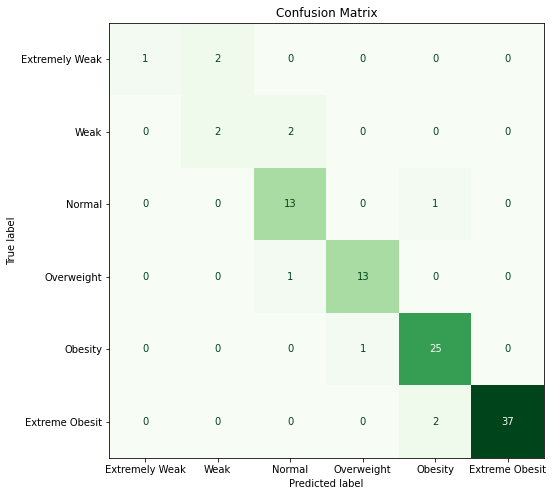

In [18]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Display the confusion matrix
cm = ConfusionMatrixDisplay.from_estimator(grid_mr.best_estimator_, 
                                           X_test, y_test, 
                                           display_labels=['Extremely Weak', 'Weak','Normal', 'Overweight', 'Obesity', 'Extreme Obesit'],
                                           cmap="Greens",
                                           colorbar=False,
                                           ax=ax)
                                           
cm.ax_.set_title("Confusion Matrix")
plt.show()


As the classification is imbalanced, precision, recall, and f1-score will be used as evaluation metrics to assess the Multinomial Regression model's performance.

### Calculating Precision, Recall and F1-Score

In [19]:
# Predict on the test set
y_pred_mr = grid_mr.predict(X_test)

# Calculate evaluation metrics
prf_mr = precision_recall_fscore_support(y_test, y_pred_mr, average='weighted')

The `precision_recall_fscore_support` function calculates the precision, recall, F1-score, and support for each class and returns the weighted average of these metrics across all classes.

In this case, `y_test` contains the true labels for the test set and `y_pred_mr` contains the predicted labels generated by the Multinomial logistic regression model. The `average='weighted'` parameter calculates the weighted average of precision, recall, and F1-score, taking into account class imbalances. 

The calculated evaluation metrics for the Multinomial logistic regression model can be accessed through the `prf_mr` variable.

In [20]:
# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred_mr))

# Print the evaluation metrics
print("Precision: {:.4f}".format(prf_mr[0]))
print("Recall: {:.4f}".format(prf_mr[1]))
print("F1-score: {:.4f}".format(prf_mr[2]))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.50      0.50         4
           2       0.81      0.93      0.87        14
           3       0.93      0.93      0.93        14
           4       0.89      0.96      0.93        26
           5       1.00      0.95      0.97        39

    accuracy                           0.91       100
   macro avg       0.86      0.77      0.78       100
weighted avg       0.92      0.91      0.91       100

Precision: 0.9159
Recall: 0.9100
F1-score: 0.9068


- The `classification report` shows the `precision`, `recall`, and `F1-score` for each class, as well as the weighted average metrics. 
- The precision metric measures the proportion of true positive predictions in all positive predictions. 
- The recall metric measures the proportion of true positive predictions in all actual positives. 
- The F1-score is the harmonic mean of precision and recall. 

**Classification Report of Multinomial Regression Model**

1. Based on the classification report, the logistic regression model achieved an `overall accuracy` of `91%`, with `precision` of `0.92`, `recall` of `0.91`, and `F1-score` of `0.91`. 
2. The model performed relatively well in predicting the `'Normal'` weight class with a high `F1-score` of `0.87` and the `'Extreme Obesity'` class with an `F1-score` of `0.97`. 
3. However, it didn't perform well in predicting the `'Extremely Weak'` class with an `F1-score` of `0.50`. 
4. The weighted average of the `precision`, `recall`, and `F1-score` is calculated based on the support of each class, which is the number of instances in each class.

## Choosing Final Model

The `logistic regression model outperforms the KNN model` in terms of overall accuracy, precision, recall, and F1-score. The logistic regression model achieved an overall accuracy of 91%, with a precision of 0.92, recall of 0.91, and F1-score of 0.91, while the KNN model achieved an overall accuracy of 84% with a weighted average precision, recall, and F1-score of 85%, 84%, and 84%, respectively. 

Although `the KNN model performed well in predicting some classes`, such as the Extreme Obesity class with an F1-score of 94%, it had a very low F1-score of 50% for the Extremely Weak class. Moreover, the macro-averaged precision, recall, and F1-score of the KNN model were around 70%, indicating that the model was performing reasonably well in predicting each class. 

On the other hand, `the logistic regression model performed relatively well in predicting the 'Normal' weight class with a high F1-score of 0.87 and the 'Extreme Obesity' class with an F1-score of 0.97`. Although it didn't perform well in predicting the 'Extremely Weak' class with an F1-score of 0.50, it outperformed the KNN model overall. Therefore, `we should choose the logistic regression model` as the better model for this classification task.

### Creating the Final model with fine-tuned hyperparameters using Multinomial regression.

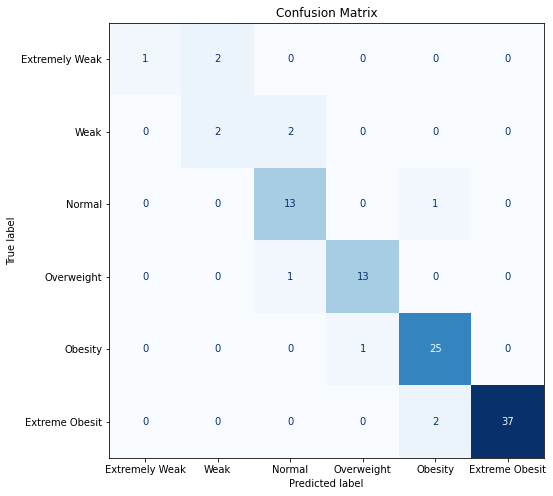

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.50      0.50         4
           2       0.81      0.93      0.87        14
           3       0.93      0.93      0.93        14
           4       0.89      0.96      0.93        26
           5       1.00      0.95      0.97        39

    accuracy                           0.91       100
   macro avg       0.86      0.77      0.78       100
weighted avg       0.92      0.91      0.91       100

------------------------------
Accuracy: 91.00%
Precision: 0.9159
Recall: 0.9100
F1-score: 0.9068


In [21]:
# Load Data
data = pd.read_csv("datasets/bmi.csv")

# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['Index']), 
    data['Index'], 
    test_size=0.2, 
    random_state=1300, 
    stratify=data['Index']
)

# Set up the preprocessing pipeline
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, X_train.select_dtypes(include=['float64','int64']).columns),
                                               ('cat', categorical_transformer, ['Gender'])])

# Set up the model pipeline 
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(multi_class='multinomial', C=10, solver='lbfgs'))]) 
model.fit(X_train, y_train) 

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Predict on the test set
y_pred = model.predict(X_test)

# Plot confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Extremely Weak', 'Weak','Normal', 'Overweight', 'Obesity', 'Extreme Obesit'],
                                        cmap="Blues",
                                        colorbar=False,
                                        ax=ax)
cm.ax_.set_title("Confusion Matrix")
plt.show()

# Calculate evaluation metrics
prf = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print('------------------------------')
print("Accuracy: %.2f%%" %  (acc*100))

# Print the evaluation metrics
print("Precision: {:.4f}".format(prf[0]))
print("Recall: {:.4f}".format(prf[1]))
print("F1-score: {:.4f}".format(prf[2]))

## Conclusion

**Summary of the classification report and accuracy metrics**:

- The overall `accuracy` of the model is `91.00%`, which means that it correctly classified 91 out of 100 instances in the test set.
- Precision refers to the proportion of instances that were correctly classified as a particular class out of all instances that were predicted to be that class. The weighted average `precision` of the model is `0.9159`.
- Recall, or sensitivity, refers to the proportion of instances that were correctly classified as a particular class out of all instances that actually belong to that class. The weighted average `recall` of the model is` 0.9100`.
- F1-score is the harmonic mean of precision and recall. The weighted average `F1-score `of the model is `0.9068`.
- The classification report provides a breakdown of precision, recall, and F1-score for each individual class.
- The `confusion matrix` and `classification` report indicate that the `model performs well` for most classes, but has some difficulty with the "Extremely Weak" and "Weak" classes, as indicated by their lower precision and recall scores.
- Overall, the model seems to be performing well, but may benefit from further tuning and optimization to improve its performance on the lower-performing classes.

In [22]:
import session_info
session_info.show()